In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from matplotlib import pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
df = pd.read_csv("/kaggle/input/sf-salaries/Salaries.csv")
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [82]:
df = df[['Year', 'TotalPay']]
df

,Year,TotalPay
0,2011,567595.43
1,2011,538909.28
2,2011,335279.91
3,2011,332343.61
4,2011,326373.19
...,...,...
148649,2014,0.00
148650,2014,0.00
148651,2014,0.00
148652,2014,0.00


In [83]:
df.isna().sum()

Year        0
TotalPay    0
dtype: int64

Text(0, 0.5, 'TotalPay')

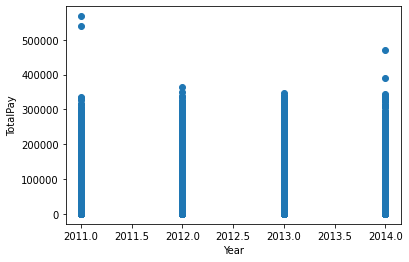

In [84]:
plt.scatter(df.Year,df.TotalPay)
plt.xlabel('Year')
plt.ylabel('TotalPay')

In [85]:
df.Year.unique()

array([2011, 2012, 2013, 2014])

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [87]:
scaler = MinMaxScaler()

scaler.fit(df[['TotalPay']])
df['TotalPay'] = scaler.transform(df[['TotalPay']])

scaler.fit(df[['Year']])
df['Year'] = scaler.transform(df[['Year']])


In [88]:
df.Year.unique()

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [89]:
df.TotalPay.unique()

array([1.        , 0.9495152 , 0.59114753, ..., 0.00111053, 0.00109841,
       0.        ])

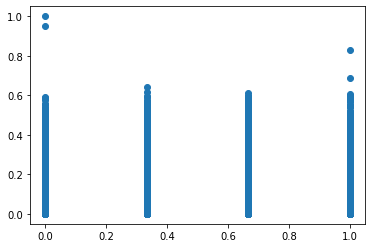

In [90]:
plt.scatter(df.Year, df.TotalPay)


# Checking the elbow plot point

In [91]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

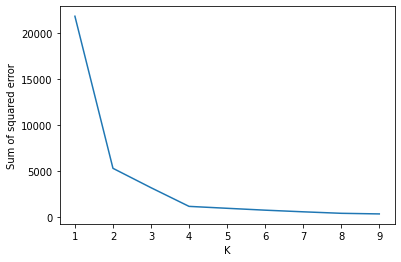

In [92]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [93]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [94]:
np.unique(y_predicted)

array([0, 1, 2, 3], dtype=int32)

In [95]:
df['cluster']=y_predicted
df.head()

,Year,TotalPay,cluster
0,0.0,1.000000,0
1,0.0,0.949515,0
2,0.0,0.591148,0
3,0.0,0.585980,0
4,0.0,0.575473,0


In [96]:
km.cluster_centers_

array([[-1.32116540e-13,  1.27350417e-01],
       [ 1.00000000e+00,  1.33896924e-01],
       [ 6.66666667e-01,  1.37676357e-01],
       [ 3.33333333e-01,  1.31519903e-01]])

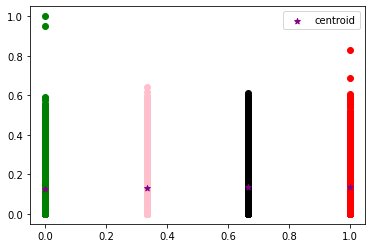

In [97]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Year,df1.TotalPay,color='green')
plt.scatter(df2.Year,df2.TotalPay,color='red')
plt.scatter(df3.Year,df3.TotalPay,color='black')
plt.scatter(df4.Year,df4.TotalPay,color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()